# Prediction using Supervised ML

Simple Linear Regression
Predict the percentage of an Student based on the number of study hours

Data can be found at: http://bit.ly/w-data

Language: Python

# Task 1 By Slavi Dsa

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\celcia\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading the Data

In [2]:
url= "http://bit.ly/w-data"
sc=pd.read_csv(url)

### Understanding the Data

In [3]:
#View the data
sc.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#show column Names
sc.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#get the no. of rows and columns
sc.shape

(25, 2)

In [6]:
#check for any missing null values
sc.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#describing the data
sc.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#checking the data types
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Exploratory Data Analysis

### Lets have some EDA for better understanding of the data set - "Visually"

#### We labelled x-axis as "Hours" and y-axis as "%-Scores Achieved".  The formed table is titled as "Hours vs %-Scores Achieved" and the Points are noted by "dot" and the whole graph is fitted in (15,15) graph.

<Figure size 1500x1500 with 0 Axes>

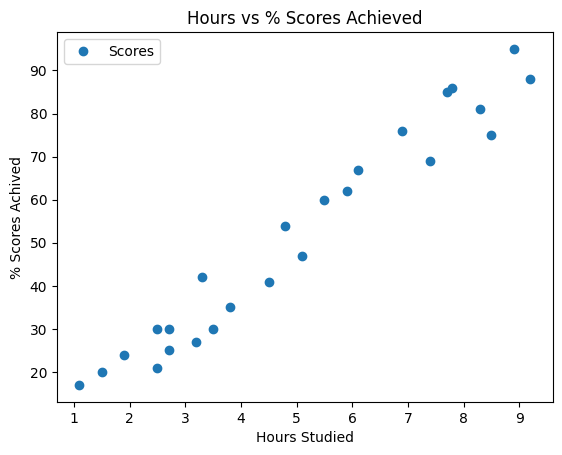

In [9]:
plt.figure(figsize = (15,15))
sc.plot(x="Hours", y="Scores", style ="o")
plt.title("Hours vs % Scores Achieved")
plt.xlabel("Hours Studied")
plt.ylabel("% Scores Achived")
plt.show()

#### Checking for Outliers

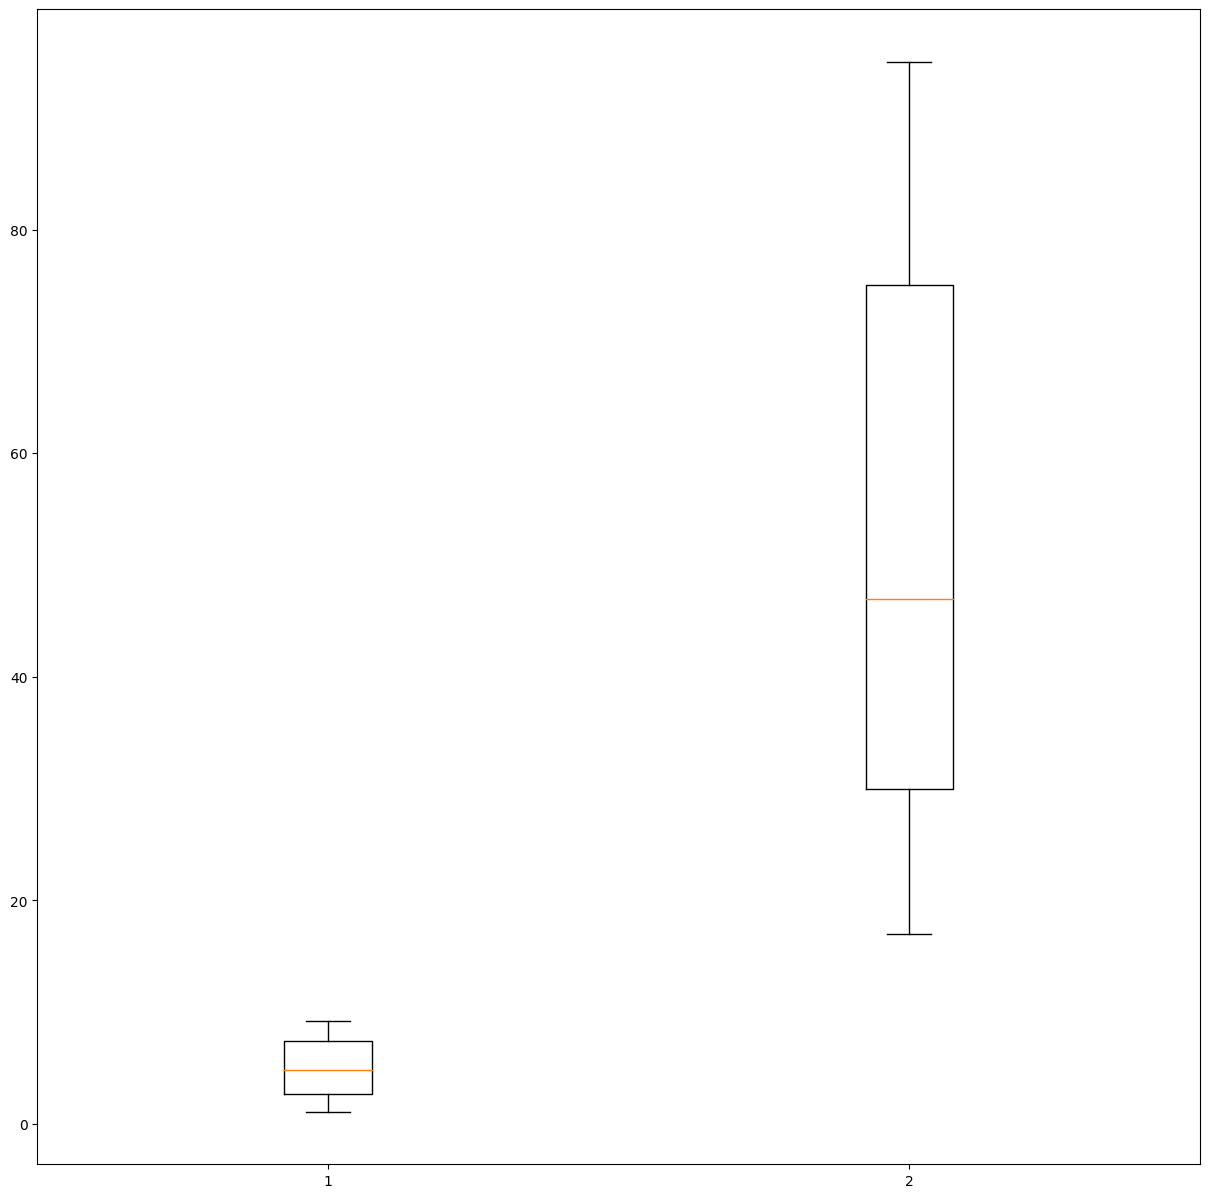

In [10]:
plt.figure(figsize = (15,15))
plt.boxplot(sc)
plt.show()

#### Extract the Dependent and the Independent variables

In [11]:
x= sc.iloc[: , :-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y = sc.iloc[: , 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data into Train & Test set :

#### Importing the train_test_split class from sklearn.model_selection Library:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size =0.2, random_state = 0)

### Fit the Simple Linear Regression model to the training dataset :

#### Import the LinearRegression class from sk.learn.linear_model Library :

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

### Predict the test & training set results :

In [16]:
y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
x_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

### Visualise the training set result :

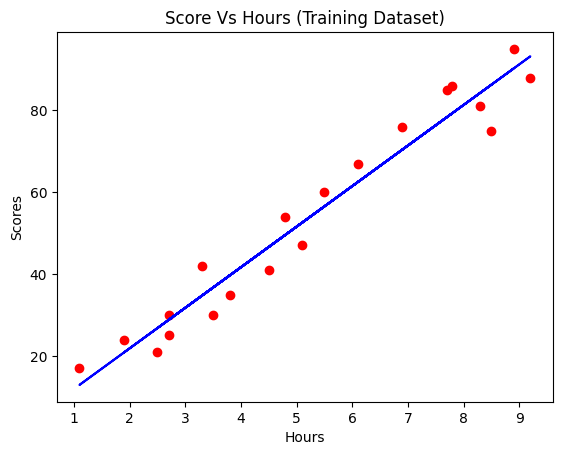

In [19]:
plt.scatter( x_train , y_train  , color = "red")
plt.plot(x_train , x_pred , color = "blue")
plt.title ( "Score Vs Hours (Training Dataset)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Visualise the test set result

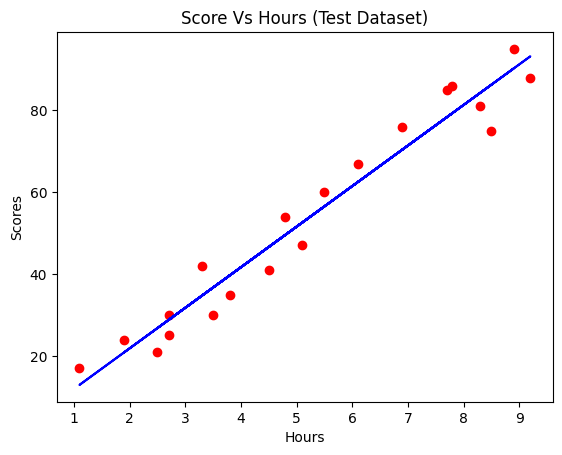

In [20]:
plt.scatter( x_train , y_train  , color = "red")
plt.plot(x_train , x_pred , color = "blue")
plt.title ( "Score Vs Hours (Test Dataset)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Calculate the Mean Absolute Error:

In [21]:
from sklearn import metrics 
print (" Mean Absolute Error : ", metrics.mean_absolute_error(y_test , y_pred))

 Mean Absolute Error :  4.183859899002975


### Comparing the Actual & Predicted :

In [22]:
sc1 = pd.DataFrame ({ "Actual": y_test, "Predicted" : y_pred})
sc1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What will be the predicted score if a student studies for 9.25hrs per day?

### Prediction

In [23]:
hours = [[ 9.25 ]]
pred = reg.predict(hours)
print(" No of Hours  {}" .format(hours))
print ( " Predicted Score = {}".format(pred[0]))

 No of Hours  [[9.25]]
 Predicted Score = 93.69173248737535


### Conclusion: If Student will study for 9.25 Hours then they will get approx 93.69%